In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as stats
from scipy import stats
import seaborn as sns
plt.rcParams['font.size'] = 18
#plt.rcParams['font.family'] = "serif"
tdir = 'in'
major = 5.0
minor = 3.0
plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir
plt.rcParams['xtick.major.size'] = major
plt.rcParams['xtick.minor.size'] = minor
plt.rcParams['ytick.major.size'] = major
plt.rcParams['ytick.minor.size'] = minor

In [4]:
def results_dict(lines, val):
    results = {'2018-01': [], '2018-02': [], '2018-03': [], '2018-04': [],
               '2018-05': [],'2018-06': [],'2018-07': [],'2018-08': [],
               '2018-09': [],'2018-10': [],'2018-11': [],'2018-12': []}
    
    if val == 'acc':
        ind = 3
    if val == 'rocauc':
        ind = 4
    if val == 'trtime':
        ind = 2
    if val == 'epoch':
        ind = 1
        
    for line in lines:
        l = line.split('\t')
        results[l[0]] += [float(l[ind])]
            
    res = [v for k, v in results.items()]
    res_mean_ = np.array([np.mean(v) for v in res])
    res_std_ = np.array([np.std(v) for v in res])    
    
    return res, res_mean_, res_std_

def get_plot_data(results_dir, replay_sample):
    
    if results_dir == './pjr_with_random_buffer_results/':
        results_file = results_dir + 'PJR_replay_' + str(replay_sample) +\
                        '/results_accumulated_replay_' + str(replay_sample) + '_results.txt'

    else:
        results_file = results_dir + str(replay_sample) + '_results.txt'
        #balanced_results_accumulated_replay_500_results.txt
        
    print(results_file)
    with open(results_file) as f:
        lines = f.readlines()
        acc, acc_mean, acc_std = results_dict(lines, 'acc')
        rocauc, rocauc_mean, rocauc_std = results_dict(lines, 'rocauc')
        trtime, trtime_mean, trtime_std = results_dict(lines, 'trtime')
        epochs, epochs_mean, epochs_std = results_dict(lines, 'epoch')
    
#     mins = []
#     for x in acc:
#         if len(x) == 1:
#             mins = x[0]
#             break
#         else:
#             mins.append(min(x))
    
    print(f'Replay {replay_sample} mean {np.mean(acc_mean) * 100:.2f}\u00B1{np.std(acc_mean) * 100:.2f} Minimum {np.mean(acc_mean[0])* 100:.2f}\u00B1{np.std(acc_mean[0])* 100:.2f}')
    print()
    
    
    return acc, acc_mean



# none_accs, none_accs_mean =\
#             get_plot_data('./pjr_with_random_buffer_results/', 0.0)

# r20_accs, r20_accs_mean =\
#             get_plot_data('./pjr_with_random_buffer_results/', 0.20)

# r50_accs, r50_accs_mean =\
#     get_plot_data('./pjr_with_random_buffer_results/', 0.50)

# joint_accs, joint_accs_mean =\
#     get_plot_data('./pjr_with_random_buffer_results/', 1.0)

# fivehundred_acc, fivehundred_acc_mean =\
#     get_plot_data('./saved_results/NEW_PJR_replay_500/results_accumulated_replay_', 500)

# five00_if, five00_if_mean =\
#     get_plot_data('./IFBased_saved_results_ifbased_/IFBased_PJR_replay_500/balanced_results_accumulated_replay_', 500)

# five00_if_n1, five00_if_n1_mean =\
#     get_plot_data('./IFBased_saved_results_ifbased_/IFBased_PJR_replay_500/next_1_results_accumulated_replay_', 500)

# five00_if_n2, five00_if_n2_mean =\
#     get_plot_data('./IFBased_saved_results_ifbased_/IFBased_PJR_replay_500/next_2_results_accumulated_replay_', 500)

# five00_if_n3, five00_if_n3_mean =\
#     get_plot_data('./IFBased_saved_results_ifbased_/IFBased_PJR_replay_500/next_3_results_accumulated_replay_', 500)


five00_ifhd, five00_ifhd_mean =\
    get_plot_data('./IFBased_saved_results_if_hdbscan_/IFBased_PJR_replay_500/if_hdbscan_results_accumulated_replay_', 500)

# five00_hd1, five00_hd1_mean =\
#     get_plot_data('./HDBScanBased_saved_results_HDBScanBased/HDBScanBased_PJR_replay_500/hdbscan_v1_', 500)

five00_hd2, five00_hd2_mean =\
    get_plot_data('./HDBScanBased_saved_results_HDBScanBased/HDBScanBased_PJR_replay_500/hdbscan_v2_', 500)


# five00_hd3, five00_hd3_mean =\
#     get_plot_data('./HDBScanBased_saved_results_HDBScanBased/HDBScanBased_PJR_replay_500/hdbscan_v3_', 500)


# five00_if_n22, five00_if_n22_mean =\
#     get_plot_data('./IFBased_saved_results_ifbased_/IFBased_PJR_replay_500/next_2_stdBefore_', 500)


f00_hd_10_5, f00_hd_10_5_mean =\
    get_plot_data('./HDBScanBased_saved_results_HDBScanBased/HDBScanBased_PJR_replay_500/hdbscan_10_5_stdBefore_', 500)


f00_hd_30_2, f00_hd_30_2_mean =\
    get_plot_data('./HDBScanBased_saved_results_HDBScanBased/HDBScanBased_PJR_replay_500/hdbscan_30_2_stdBefore_', 500)

f00_hd_50_2, f00_hd_50_2_mean =\
    get_plot_data('./HDBScanBased_saved_results_HDBScanBased/HDBScanBased_PJR_replay_500/hdbscan_50_2_stdBefore_', 500)



ifhd105_exem, ifhd105mean_exem =\
    get_plot_data('./IFBased_saved_results_if_hdbscan_/IFBased_PJR_replay_500/ifhd_10_5_exemplars_', 500)

ifhd105_500, ifhd105mean_500 =\
    get_plot_data('./IFBased_saved_results_if_hdbscan_/IFBased_PJR_replay_500/ifhd_10_5_exemplarsStrict_', 500)


print()
print()

# print(f'0%             : {np.mean(none_accs_mean):.4f} \u00B1 {np.std(none_accs_mean):.4f}')
# print(f'20%            : {np.mean(r20_accs_mean):.4f} \u00B1 {np.std(r20_accs_mean):.4f}')
# print()
# print(f'50%            : {np.mean(r50_accs_mean):.4f} \u00B1 {np.std(r50_accs_mean):.4f}')

print(f'500-IF-HDBSCAN  : {np.mean(five00_ifhd_mean):.4f} \u00B1 {np.std(five00_ifhd_mean):.4f}')
print()


# print(f'500-HDBSCAN-V1  : {np.mean(five00_hd1_mean):.4f} \u00B1 {np.std(five00_hd1_mean):.4f}')
print(f'500-HDBSCAN-V2  : {np.mean(five00_hd2_mean):.4f} \u00B1 {np.std(five00_hd2_mean):.4f}')
# print(f'500-HDBSCAN-V3  : {np.mean(five00_hd3_mean):.4f} \u00B1 {np.std(five00_hd3_mean):.4f}')
print()
print(f'500-HDBDS-10-5  : {np.mean(f00_hd_10_5_mean):.4f} \u00B1 {np.std(f00_hd_10_5_mean):.4f}')
print(f'500-HDBDS-30-2  : {np.mean(f00_hd_30_2_mean):.4f} \u00B1 {np.std(f00_hd_30_2_mean):.4f}')
print(f'500-HDBDS-50-2  : {np.mean(f00_hd_50_2_mean):.4f} \u00B1 {np.std(f00_hd_50_2_mean):.4f}')
print()

# print()
# print(f'Exem IF-HDBDSCAN-10-5  : {np.mean(ifhd105mean_exem):.4f} \u00B1 {np.std(ifhd105mean_exem):.4f}')
# print(f'fixed IF-HDBDSCA-10-5  : {np.mean(ifhd105mean_500):.4f} \u00B1 {np.std(ifhd105mean_500):.4f}')
print()



# print(f'100%           : {np.mean(joint_accs_mean):.4f} \u00B1 {np.std(joint_accs_mean):.4f}')


./IFBased_saved_results_if_hdbscan_/IFBased_PJR_replay_500/if_hdbscan_results_accumulated_replay_500_results.txt
Replay 500 mean 94.31±1.29 Minimum 92.56±0.00

./HDBScanBased_saved_results_HDBScanBased/HDBScanBased_PJR_replay_500/hdbscan_v2_500_results.txt
Replay 500 mean 94.01±0.81 Minimum 92.87±0.00

./HDBScanBased_saved_results_HDBScanBased/HDBScanBased_PJR_replay_500/hdbscan_10_5_stdBefore_500_results.txt
Replay 500 mean 94.66±0.52 Minimum 94.55±0.00

./HDBScanBased_saved_results_HDBScanBased/HDBScanBased_PJR_replay_500/hdbscan_30_2_stdBefore_500_results.txt
Replay 500 mean 94.56±0.74 Minimum 92.69±0.00

./HDBScanBased_saved_results_HDBScanBased/HDBScanBased_PJR_replay_500/hdbscan_50_2_stdBefore_500_results.txt
Replay 500 mean 94.56±0.58 Minimum 93.59±0.00

./IFBased_saved_results_if_hdbscan_/IFBased_PJR_replay_500/ifhd_10_5_exemplars_500_results.txt
Replay 500 mean 94.82±0.65 Minimum 93.68±0.00

./IFBased_saved_results_if_hdbscan_/IFBased_PJR_replay_500/ifhd_10_5_exemplarsStrict_5

In [13]:
f00_hd_10_5

[[0.9455416798591614],
 [0.9390626847743988],
 [0.9377732872962952],
 [0.9464821219444275],
 [0.9473743557929992],
 [0.9505290985107422],
 [0.9528644581635793],
 [0.9529950107846942],
 [0.950896367430687],
 [0.952125632762909],
 [0.9406580328941345],
 [0.9434962272644043]]

/home/mr6564/anaconda3/envs/PyTorch/lib/python3.7/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/home/mr6564/anaconda3/envs/PyTorch/lib/python3.7/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


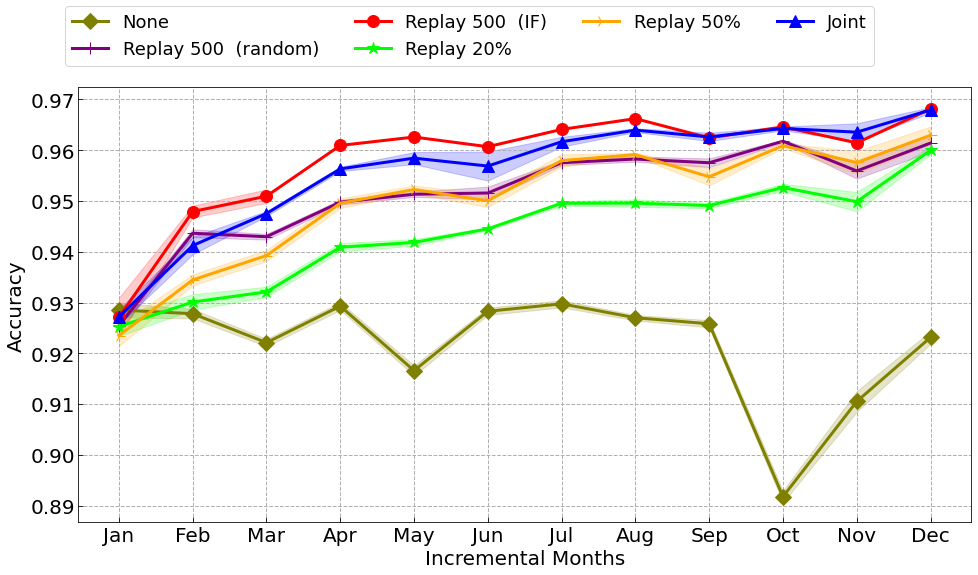

In [27]:
save_file_rocauc = 'HS.png'

x_axis = np.array([i for i in range(12)])

plt.figure(figsize=(16, 8))

none_sem = [stats.sem(none_accs[i]) for i in range(len(none_accs))]
plt.fill_between(x_axis + [1], none_accs_mean-none_sem, none_accs_mean+none_sem, color='olive', alpha=0.2)
plt.plot(x_axis + [1],none_accs_mean, 'olive', marker= 'D', markersize=12, linewidth=3.0)


fivehundred_sem = [stats.sem(fivehundred_acc[i]) for i in range(len(fivehundred_acc))]
plt.fill_between(x_axis + [1],\
    fivehundred_acc_mean-fivehundred_sem, fivehundred_acc_mean+fivehundred_sem, color='purple', alpha=0.2)
plt.plot(x_axis + [1],fivehundred_acc_mean, 'purple',marker= '+', markersize=12, linewidth=3.0)


five00_if_sem = [stats.sem(five00_if[i]) for i in range(len(five00_if))]
plt.fill_between(x_axis + [1],\
    five00_if_mean-five00_if_sem, five00_if_mean+five00_if_sem, color='red', alpha=0.2)
plt.plot(x_axis + [1],five00_if_mean, 'red',marker= 'o', markersize=12, linewidth=3.0)



r20_sem = [stats.sem(r20_accs[i]) for i in range(len(r20_accs))]
plt.fill_between(x_axis + [1], r20_accs_mean-r20_sem, r20_accs_mean+r20_sem, color='lime', alpha=0.2)
plt.plot(x_axis + [1],r20_accs_mean, 'lime',marker= '*', markersize=12, linewidth=3.0)


r50_sem = [stats.sem(r50_accs[i]) for i in range(len(r50_accs))]
plt.fill_between(x_axis + [1], r50_accs_mean-r50_sem, r50_accs_mean+r50_sem, color='orange', alpha=0.2)
plt.plot(x_axis + [1],r50_accs_mean, 'orange',marker= '4', markersize=12, linewidth=3.0)


joint_sem = [stats.sem(joint_accs[i]) for i in range(len(joint_accs))]
plt.fill_between(x_axis + [1], joint_accs_mean-joint_sem, joint_accs_mean+joint_sem, color='blue', alpha=0.2)
plt.plot(x_axis + [1],joint_accs_mean, 'blue',marker= '^', markersize=12, linewidth=3.0);


plt.legend(
           ['None', 'Replay 500  (random)', 'Replay 500  (IF)',\
            'Replay 20%', 'Replay 50%', 'Joint'],\
          ncol=4, loc=(-0.015, 1.05))


plt.ylabel('Accuracy', fontsize=20)
plt.xlabel('Incremental Months', fontsize=20)
plt.xticks([1, 2,3,4,5, 6, 7, 8, 9, 10, 11, 12], ['Jan', 'Feb', 'Mar', 'Apr',\
                                                  'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=20) 
plt.yticks(fontsize=20)
plt.grid(True, linestyle='--', linewidth=1.)

plt.savefig('./figures/isolation_forest/' + save_file_rocauc, bbox_inches='tight', transparent=True);